In [1]:
import sys
sys.path.append(r'../../gempy/')

import gempy as gp

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import copy
import gempy.utils.fishdist as fish

print(gp)

To fit a spherical distribution to the orientation measurements, spherecluster must be installed.
<module 'gempy' from '../../gempy/gempy/__init__.py'>


## Set up the Graben Model

Active grids: ['regular']
Active grids: ['regular' 'topography']
Active grids: ['regular' 'topography' 'sections']


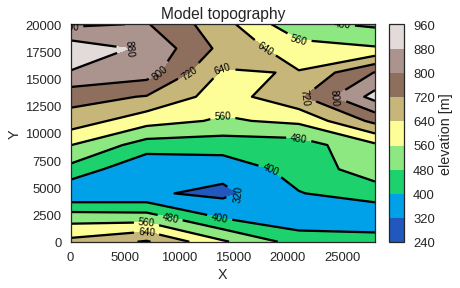

In [2]:
mode = 'section' # for a 2D Stoch model, change to 3Dblock for 3D modeling

if mode == '3Dblock':
    res = [50, 100, 100]
elif mode == 'section':
    res = [10, 5, 10]

    # Import data
# Create a model instance
geo_model = gp.create_model('PCT_model')

# Initialize the model, set dimension and load interface and orientation data
gp.init_data(geo_model, [0, 28000., 0, 20000., -6500, 1000.], resolution=res,
            path_i = '../data/leu2008/line82_interfaces_reduced_999.csv',
            path_o = '../data/leu2008/line82_foliations_reduced.csv');
geo_model.set_topography(source='random', d_z=np.array([300,1000]), fd=1.6);

# Assign formations to series
gp.map_series_to_surfaces(geo_model,
                         {"Fault2_series": 'Fault2',
                          "Fault5_series": 'Fault5',
                          "Fault6_series": 'Fault6',
                         "Post_tectonic_series": ('Quaternary', 'Tertiary', 'Mesozoic'),
                         "Syn_tectonic_series2": 'Upper-filling',
                         "Syn_tectonic_series1": 'Middle-filling',
                         "Pre_tectonic_series": 'Lower-filling'},
                         remove_unused_series=True)

# Set Faults
geo_model.set_is_fault(['Fault2_series', 'Fault5_series', 'Fault6_series'],
                      change_color=False);

geo_model.set_bottom_relation(series=['Pre_tectonic_series',
                                     'Syn_tectonic_series1',
                                     'Syn_tectonic_series2'], bottom_relation='Onlap')

if mode == 'section':
    geo_model.set_section_grid({'s1':([0,10000], [28000,10000], [200,100])})

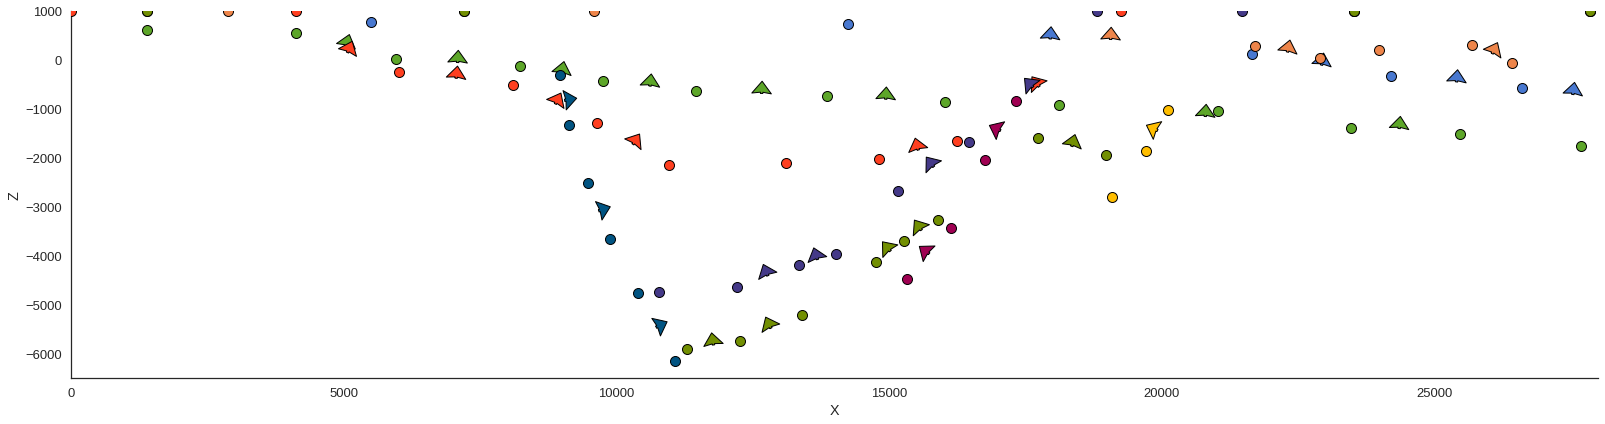

In [3]:
gp.plot.plot_data(geo_model, direction='y')
#plt.savefig('../figs/graben_data.eps', bbox_inches='tight')

In [4]:
# Set the interpolator function
# Create the theano model
gp.set_interpolator(geo_model,
                         compile_theano=True,
                         theano_optimizer='fast_compile',
                         verbose=[]);

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  3
Compilation Done!
Kriging values: 
                                    values
range                             35217.2
$C_o$                         2.95298e+07
drift equations  [3, 3, 3, 3, 3, 3, 3, 3]


In [5]:
# table of fault relations
geo_model.faults.faults_relations_df

,Fault2_series,Fault5_series,Fault6_series,Post_tectonic_series,Syn_tectonic_series2,Syn_tectonic_series1,Pre_tectonic_series,Basement
Fault2_series,False,False,False,True,True,True,True,True
Fault5_series,False,False,False,True,True,True,True,True
Fault6_series,False,False,False,True,True,True,True,True
Post_tectonic_series,False,False,False,False,False,False,False,False
Syn_tectonic_series2,False,False,False,False,False,False,False,False
Syn_tectonic_series1,False,False,False,False,False,False,False,False
Pre_tectonic_series,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False


In [6]:
fr = np.array([[False, False, False, False, True, True, True, True],
               [False, False, False, False, True, True, True, True],
               [False, False, False, False, True, True, True, True],
               [False, False, False, False, False, False, False, False],
               [False, False, False, False, False, False, False, False],
               [False, False, False, False, False, False, False, False],
               [False, False, False, False, False, False, False, False],
               [False, False, False, False, False, False, False, False]])
geo_model.faults.set_fault_relation(fr)

,Fault2_series,Fault5_series,Fault6_series,Post_tectonic_series,Syn_tectonic_series2,Syn_tectonic_series1,Pre_tectonic_series,Basement
Fault2_series,False,False,False,False,True,True,True,True
Fault5_series,False,False,False,False,True,True,True,True
Fault6_series,False,False,False,False,True,True,True,True
Post_tectonic_series,False,False,False,False,False,False,False,False
Syn_tectonic_series2,False,False,False,False,False,False,False,False
Syn_tectonic_series1,False,False,False,False,False,False,False,False
Pre_tectonic_series,False,False,False,False,False,False,False,False
Basement,False,False,False,False,False,False,False,False


In [7]:
sol = gp.compute_model(geo_model, compute_mesh=True)

../../gempy/gempy/core/solution.py:288: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


../../gempy/gempy/plot/visualization_2d.py:208: UserWarning: the orientations are not converted to apparent dip.
  warnings.warn('the orientations are not converted to apparent dip.')


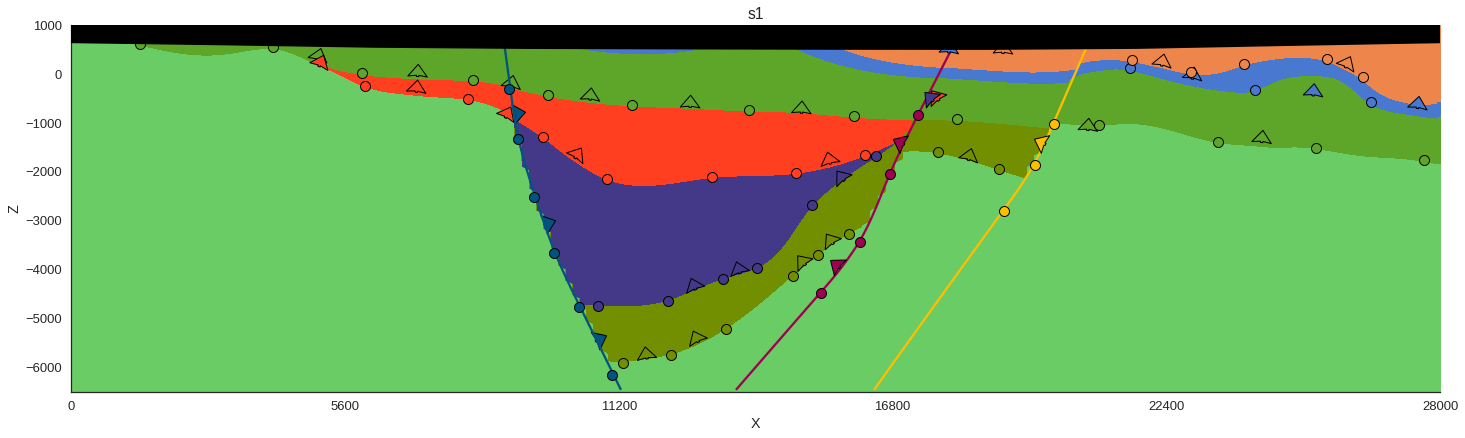

In [8]:
if mode == 'section':
    gp.plot.plot_section_by_name(geo_model, 's1', show_all_data=True)
    plt.savefig('../imgs/PCT_model_line82.svg', bbox_inches='tight')

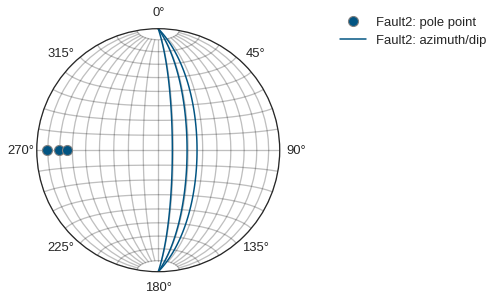

In [9]:
gp.plot.plot_stereonet(geo_model, litho=['Fault2'])
plt.savefig('../imgs/Fault2_dip_original.svg', bbox_inches='tight')

Von Mises Fisher distribution
Formation:'fault'
Mean orientation = (90, 80)
Kappa = 50



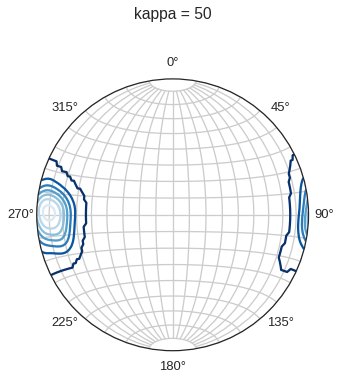

In [11]:
# this cell is just to see how it works
fault_mean = geo_model.orientations.df.loc[geo_model.orientations.df['surface'] == 'Fault2', ['G_x', 'G_y', 'G_z']].values[0]
fishdist = fish.vMF(name='fault', mean=fault_mean, kappa=50)
print(fishdist)
fishdist.sample(num_samples=50)
# visualize possible samples from spherical distribution
fishdist.plot_stereonet(poles=False)
#plt.savefig('../imgs/vMF_Fault2.svg')

## Define random function for input data

In [12]:
# copy original orientations
orient = geo_model.orientations.df.copy()
kappadict = {'Fault2': 30, 'Fault5': 40, 'Fault6': 50}

# assign the kappa to the copied dataframe
for surface, kappa in kappadict.items():
    orient.loc[orient['surface'] == surface, 'kappa'] = kappa
    
kappas = orient['kappa']

In [13]:
def create_vMF_list(geo_model, kappas, datatype='all'):
    faultsdf = geo_model.faults.df
    orientdf = geo_model.orientations.df
    vMF_list = []
    if datatype == 'faultsonly':
        faults = list(faultsdf[faultsdf['isFault']==True].index)
        df = orientdf[orientdf.series.isin(faults)]
    elif datatype == 'lithonly':
        notfaults = list(faultsdf[faultsdf['isFault']==False].index)
        df = orientdf[orientdf.series.isin(notfaults)]
    elif datatype == 'all':
        df = orientdf
    else:
        print('Nope.')
        
    for i, j in df[['G_x', 'G_y', 'G_z']].iterrows():
        count = 0
        vMF_list.append(fish.vMF('vMF_' + str(i), mean=j[['G_x', 'G_y', 'G_z']].values,
                                kappa=kappas[count]))
        count += 1
    return vMF_list

In [14]:
vMF_list = create_vMF_list(geo_model, kappas, datatype='all')

## Entropy computation

In [15]:
# unique lith ids
lith_id = np.unique(geo_model.solutions.lith_block.astype(int))

# solutions
if mode == 'section':
    geomap = geo_model.solutions.geological_map[0].astype(int)[0]
    count_map = np.zeros((len(lith_id), geomap.shape[0]))
    sec1 = geo_model.solutions.sections[0].astype(int)[0]
    count_sec = np.zeros((len(lith_id), sec1.shape[0]))
elif mode == '3Dblock':
    block = np.round(geo_model.solutions.lith_block).astype(int)
    count_block = np.zeros((len(lith_id), block.shape[0]))

### MC Simulation

In [16]:
## progress bar
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

In [17]:
# in order to move the location of the fault, copy the values of the initial dataframe:
west_east = copy.copy(geo_model.surface_points.df['X'])
north_south = copy.copy(geo_model.surface_points.df['Y'])
depth = copy.copy(geo_model.surface_points.df['Z'])

/home/bl2/anaconda3/lib/python3.6/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.48825e-21): result may not be accurate.
  rval = scipy.linalg.solve(A, b)
/home/bl2/anaconda3/lib/python3.6/site-packages/theano/tensor/slinalg.py:255: LinAlgWarning: Ill-conditioned matrix (rcond=1.15765e-37): result may not be accurate.
  rval = scipy.linalg.solve(A, b)


done


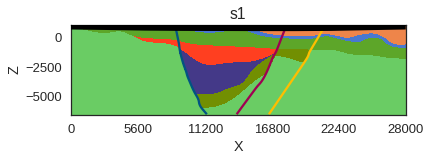

In [18]:
# solution arrays
if mode == 'section':
    geomap  = np.round(geo_model.solutions.geological_map[0]).astype(int)[0]
    count_map = np.zeros((len(lith_id), geomap.shape[0]))
    section1  = np.round(geo_model.solutions.sections[0]).astype(int)[0]
    #init counters
    count_section = np.zeros((len(lith_id), section1.shape[0]))
elif mode == '3Dblock':
    block = np.round(geo_model.solutions.lith_block).astype(int)
    count_block = np.zeros((len(lith_id), block.shape[0]))

# unique lith ids
lith_id = np.unique(np.round(geo_model.solutions.lith_block).astype(int))

datatype = 'faultsonly' # lithonly for only lithology data, faultonly for only fault data, all for all data
spec = '2_' # just another variable to not overwrite saved things

n_iter = range(50) #number of iterations

# Uncertainties
orientation_uncertainty = True

location_uncertainty = False



save = True
n_fig_save = 10

for i in log_progress(n_iter, name='Models'):
    #print(i)
   
    if datatype == 'all':
        mask_orient = np.ones(len(geo_model.orientations.df), dtype=bool)
        mask_surfpoints = np.ones(len(geo_model.surface_points.df), dtype=bool)
    elif datatype == 'lithonly':
        notfaults = list(geo_model.faults.df[geo_model.faults.df['isFault']==False].index)
        mask_orient = geo_model.orientations.df.series.isin(notfaults)
        mask_surfpoints = geo_model.surface_points.df.series.isin(notfaults)
    elif datatype == 'faultsonly':
        faults = list(geo_model.faults.df[geo_model.faults.df['isFault']==True].index)
        mask_orient = geo_model.orientations.df.series.isin(faults)
        mask_surfpoints = geo_model.surface_points.df.series.isin(faults)
    
      
    if orientation_uncertainty:
        new_orientations = np.vstack(list(map(lambda x: x.sample(num_samples=1, 
                                                             direct_output=True)[0], 
                                          vMF_list)))
        a=fish.vMF()
        a.add_orientation_data(new_orientations)
        
        indexes = geo_model.orientations.df[mask_orient].index
        geo_model.modify_orientations(indexes,  G_x = new_orientations[mask_orient][:,0],
                                                G_y = new_orientations[mask_orient][:,1],
                                                G_z = new_orientations[mask_orient][:,2],
                                                azimuth = a.samples_azdip[mask_orient][:,0],
                                                dip = a.samples_azdip[mask_orient][:,1])     
    
    if location_uncertainty:
        indexes = geo_model.surface_points.df[mask_surfpoints].index
        shape = len(indexes)
        we = west_east[mask_surfpoints] + np.random.normal(0, 300, shape)
        ns = north_south[mask_surfpoints] + np.random.normal(0, 300, shape)
        d = depth[mask_surfpoints] + np.random.normal(0, 100, shape)
        geo_model.modify_surface_points(indexes, Y=ns, Z=d)

    geo_model.update_to_interpolator()
    
    _=gp.compute_model(geo_model, compute_mesh=False)
    
    ##### plot #####
    if save == True:
        if i < n_fig_save: # to see how the models look like, save the first 10 sections and maps.
            if mode == 'section':
                plt.clf()
                gp.plot.plot_section_by_name(geo_model, 's1', show_data=False)
                plt.savefig(r'../imgs/MC/s1_'+datatype+str(i)+'.svg')

                #gp.plot.plot_map(geo_model,show_data=False, contour_lines=False)
                #plt.savefig(r'figures/map_'+datatype+str(i)+'.svg')
    
    ##### calculate and update probability fields #####
    if mode == 'section':
        geomap  = geo_model.solutions.geological_map[0].astype(int)[0]
        section1  = geo_model.solutions.sections[0].astype(int)[0]
    elif mode == '3Dblock':
        block = np.round(geo_model.solutions.lith_block).astype(int)
    
    for i, l_id in enumerate(lith_id): #enumerate through all liths
        if mode == 'section':
            count_map[i][geomap == l_id] += 1 #sum up frequency
            count_section[i][section1 == l_id] += 1 
        elif mode == '3Dblock':
            count_block[i][block == l_id] +=1 #block is raveled so no need for indexing

#### finish probability calculation and save as numpy arrays ####
niter = n_iter[-1] + 1
if mode == 'section':   
    prob_map = count_map/niter
    np.save(r'../models/prob_map_'+datatype+spec+str(niter),prob_map)
    prob_section = count_section/niter
    np.save(r'../models/prob_sections_'+datatype+spec+str(niter),prob_section)
    
elif mode == '3Dblock':
    prob_block = count_block/niter
    np.save(r'../models/prob_block_'+datatype+spec+str(niter),prob_block)

print('done')

In [19]:
from matplotlib.ticker import FixedFormatter, FixedLocator
from gempy.plot import helpers
import matplotlib.colors as mcolors

In [20]:
from gempy.plot import visualization_2d
plot = visualization_2d.PlotSolution(geo_model)

In [21]:
from matplotlib.ticker import FixedFormatter, FixedLocator
from gempy.plot import helpers

def plot_probabilities(plot, block, shape, T = False, extent=None):
    fig, ax = plt.subplots(int(np.ceil(block.shape[0]/2)), 2, figsize=(20, 20))
    ax = ax.flatten()
    print(int(np.ceil(block.shape[0]/2)))
    print(block.shape)
    for i in range(block.shape[0]):
        allcolors = list(plot._color_lot.values())[plot.model.faults.n_faults:]
        formnames = list(plot._color_lot.keys())[plot.model.faults.n_faults:]
        c2 = allcolors[i]
        title = formnames[i]
        cmap = mcolors.LinearSegmentedColormap.from_list('c',['#FFFFFF',c2])
        if T:
            plotblock = block[i].reshape(shape).T
        else:
            plotblock = block[i].reshape(shape)
        im = ax[i].imshow(plotblock, origin='lower', cmap=cmap,
                    extent = extent)
        ax[i].set_title(title)
        helpers.add_colorbar(im, label='probability')
    fig.tight_layout()
    
def calculate_ie_masked(prob):
    ie = np.zeros_like(prob[0])
    for l in prob:
        pm = np.ma.masked_equal(l, 0)  # mask where prob is 0
        ie -= (pm * np.ma.log2(pm)).filled(0)
    return ie

def plot_section_by_name(self, section_name, image=None, show_data=True, show_faults=True, show_topo=True,
                         show_all_data=False, cmap='viridis', label='cell entropy', title=None, **kwargs):
    assert type(section_name) == str, 'section name must be a string of the name of the section'
    #assert self.model.solutions.sections is not None, 'no sections for plotting defined'

    j = np.where(self.model.grid.sections.names == section_name)[0][0]
    l0, l1 = self.model.grid.sections.get_section_args(section_name)
    shape = self.model.grid.sections.resolution[j]
    if image is None:
        image = self.model.solutions.sections[0][0][l0:l1].reshape(shape[0], shape[1]).T
    else: image = image.reshape(shape[0], shape[1]).T
    extent = [0, self.model.grid.sections.dist[j][0],
              self.model.grid.regular_grid.extent[4], self.model.grid.regular_grid.extent[5]]


    if show_data:
        self.plot_section_data(section_name=section_name, show_all_data=show_all_data, **kwargs)

    axes = plt.gca()
    im=axes.imshow(image, origin='lower', zorder=-100,
                cmap=cmap, extent=extent)
    if show_faults:
        self.extract_section_fault_lines(section_name, axes)

    if show_topo:
        if self.model.grid.topography is not None:
            alpha = kwargs.get('alpha', 1)
            xy = self.make_topography_overlay_4_sections(j)
            axes.fill(xy[:, 0], xy[:, 1], 'k', zorder=10, alpha=alpha)

    labels, axname = self._make_section_xylabels(section_name, len(axes.get_xticklabels()) - 2)
    pos_list = np.linspace(0, self.model.grid.sections.dist[j], len(labels))
    axes.xaxis.set_major_locator(FixedLocator(nbins=len(labels), locs=pos_list))
    axes.xaxis.set_major_formatter(FixedFormatter((labels)))
    if title is None:
        title=self.model.grid.sections.names[j]
    axes.set(title=title, xlabel=axname, ylabel='Z')
    helpers.add_colorbar(im, label=label)

In [22]:
prop_section=np.load(r'../models/prob_sections_faultsonly2_50.npy')
section_ie = calculate_ie_masked(prop_section)

4
(7, 20000)


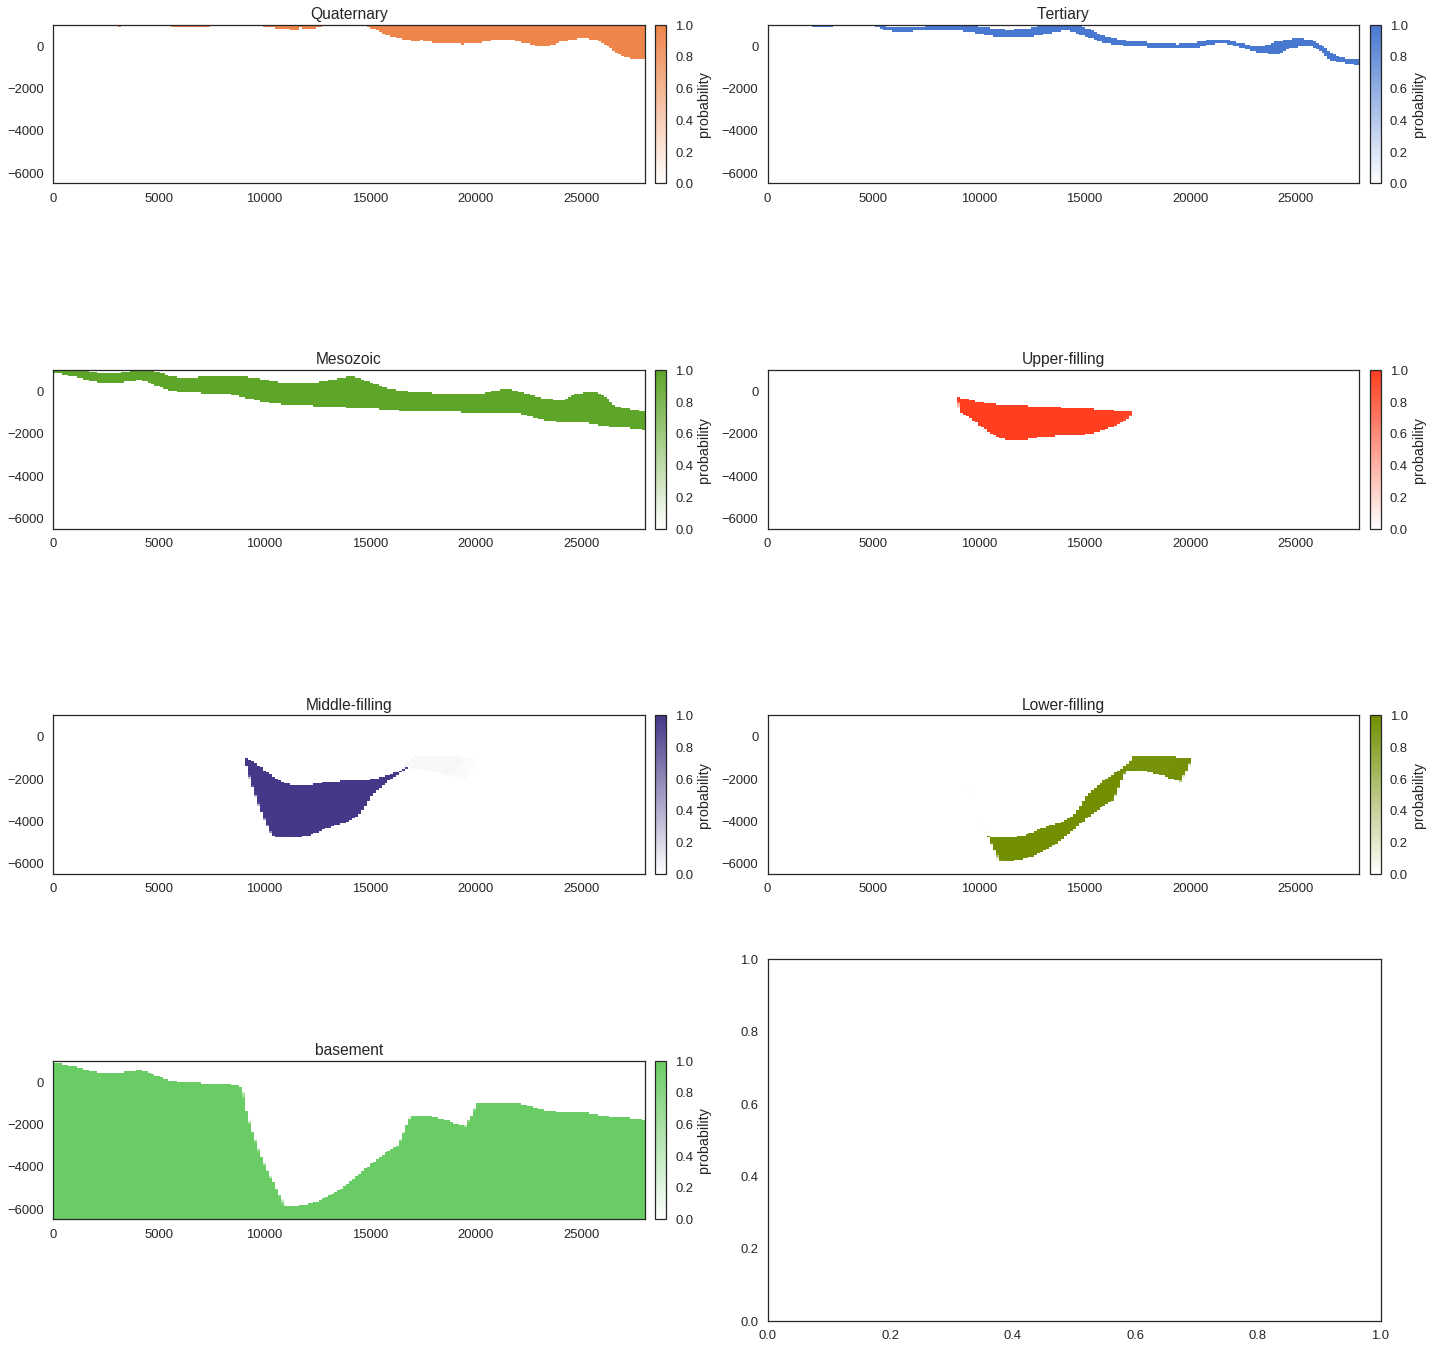

In [23]:
plot_probabilities(plot, prop_section, geo_model.grid.sections.resolution[0],
                  T=True, extent=[0,28000,-6500,1000])

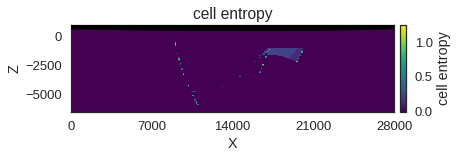

In [24]:
plot_section_by_name(plot, 's1', image = section_ie, cmap='viridis', show_data=False, show_faults=False,
                    label='cell entropy', title='cell entropy', show_topo=True)
plt.savefig('../imgs/PCT_cell_entropy_orientation_only_50.svg', bbox_inches='tight')

## Topology

In [25]:
from gempy.assets import topology as tp

In [28]:
# complete model
# edges, centroids = tp.compute_topology(geo_model)
edges, centroids = tp.compute_topology(geo_model)

<Figure size 1440x864 with 0 Axes>

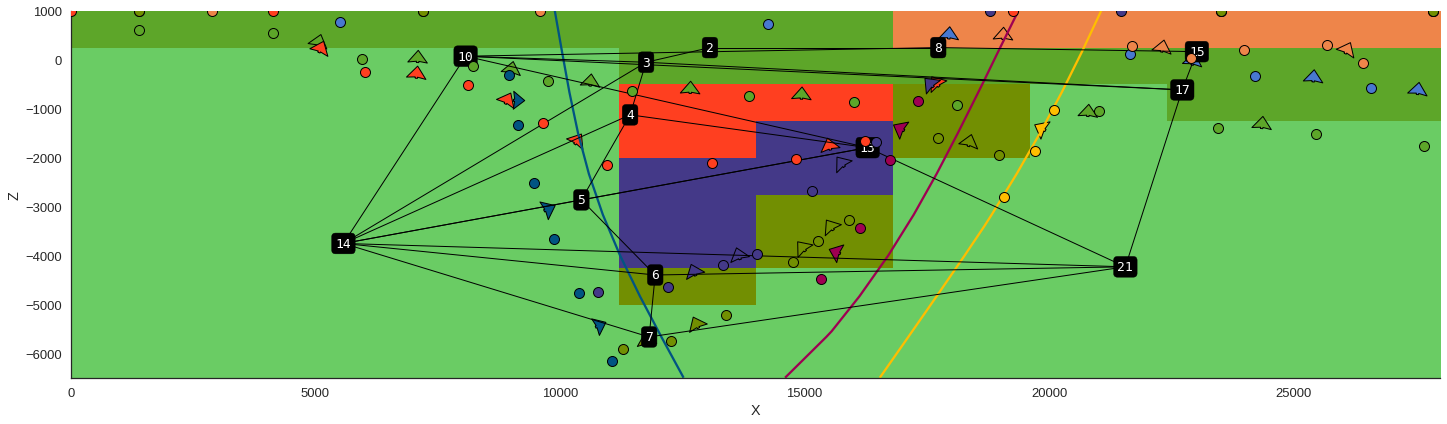

In [31]:
fig = plt.figure(figsize=[20,12])
gp.plot.plot_section(geo_model, 3, show_legend=False)
gp.plot.plot_topology(geo_model, edges, centroids, direction="y")

## backup ... geht nicht... warum auch immer

In [42]:
datatype = 'faultsonly'
spec = '2_'

n_iter = 1 # number iterations

# state which uncertainties are active
orientation_uncertainty = True
location_uncertainty = False

save = True
n_fig_save = 10

east_west = copy.copy(geo_model.surface_points.df['X'])
north_south = copy.copy(geo_model.surface_points.df['Y'])
depth = copy.copy(geo_model.surface_points.df['Z'])

#def sim_it(geo_model, vMF_list, east_west, north_south, depth, orientation_uncertainty=True, 
#           location_uncertainty=True, iterations=1, specifier='2_', datatype='all', save_fig=True, 
#           n_fig_save=10, mode='section'):
    
for i in range(n_iter):
    
    if datatype == 'all':
        mask_orientation = np.ones(len(geo_model.orientations.df), dtype=bool)
        mask_interfaces = np.ones(len(geo_model.surface_points.df), dtype=bool)
    elif datatype == 'lithonly':
        lithologies = list(geo_model.faults.df[geo_model.faults.df['isFault']==False].index)
        mask_orientation = geo_model.orientations.df.series.isin(lithologies)
        mask_interfaces = geo_model.surface_points.df.series.isin(lithologies)
    elif datatype == 'faultsonly':
        faults = list(geo_model.faults.df[geo_model.faults.df['isFault']==True].index)
        mask_orientation = geo_model.orientations.df.series.isin(faults)
        mask_interfaces = geo_model.surface_points.df.series.isin(faults)
    
    if orientation_uncertainty:
        new_orientations = np.vstack(list(map(lambda x: x.sample(num_samples=1,
                                                                direct_output=True)[0],
                                             vMF_list)))
        orient_data = fish.vMF()
        orient_data.add_orientation_data(new_orientations)
        
        indices = geo_model.orientations.df[mask_orientation].index
        print(indices)
        geo_model.modify_orientations(indices, G_x = new_orientations[mask_orientation][:,0],
                                               G_y = new_orientations[mask_orientation][:,1],
                                               G_z = new_orientations[mask_orientation][:,2],
                                               azimuth = orient_data.samples_azdip[mask_orientation][:,0],
                                               dip = orient_data.sample_azdip[mask_orientation][:,1])
    if location_uncertainty:
        indices = geo_model.surface_points.df[mask_interfaces].index
        shape = len(indices)
        
        EW = east_west[mask_interfaces] + np.random.normal(0, 70, shape)
        NS = north_south[mask_interfaces] + np.random.normal(0, 70, shape)
        D = depth[mask_interfaces] + np.random.normal(0, 70, shape)
        
        geo_model.modify_surface_points(indices, X=EW, Y=NS, Z=D)
    
    geo_model.update_to_interpolator
    
    _ = gp.compute(geo_model, compute_mesh=False)
    
    ## plot ##
    if save == True:
        if i < n_fig_save:
            if mode == 'section':
                plt.clf()
                gp.plot.plot_section_by_name(geo_model, 's1', show_data=False)
                plt.savefig(r'figures/s1_'+datatype+str(i)+'.svg')
                
    ## calculate and update probability ##
    if mode == 'section':
        geomap = geo_model.solutions.geological_map[0].astype(int)[0]
        section1 = geo_model.solutions.sections[0].astype(int)[0]
    elif mode == '3Dblock':
        block = geo_model.solutions.lith_block.astype(int)
        
    for i, j in enumerate(lith_id):
        if mode == 'section':
            count_map[i][geomap == j] += 1
            count_sec[i][section1 == j] += 1
        elif mode == '3Dblock':
            count_block[i][block == j] += 1
            
## finish prob calculation and save as np arrays ##
if mode == 'map':
    prob_map = count_map / n_iter
    np.save(r'../models/prob_map'+datatype+spec+str(n_iter), prob_map)
    prob_section = count_sec / n_iter
    np.save(r'../models/prob_sections_'+datatype+spec+str(n_iter), prob_section)
    
elif mode == '3Dblock':
    prob_block = count_block / n_iter
    np.save(r'../models/prob_block_'+datatype+spec+str(n_iter), prob_block)

print('done')
        
            

Int64Index([0, 1], dtype='int64')


AttributeError: 'vMF' object has no attribute 'sample_azdip'

In [4]:
gp.init_data(geo_model, extent=[0, 400., 0, 1400., 0, 1000.], resolution=res,
                    path_i = "../data/graben_test_interfaces.csv",
                    path_o = "../data/graben_test_orientations.csv")

gp.map_series_to_surfaces(geo_model,
                         {"Fault1_Series": 'fault1',
                         "Fault2_Series": 'fault2',
                         "Postgraben_Series": 'shale2',
                         "Pregraben_Series": ('sandstone', 'shale', 'limestone')},
                         remove_unused_series=True)

geo_model.set_is_fault(['Fault1_Series', 'Fault2_Series'])

Active grids: ['regular' 'topography' 'sections']


FileNotFoundError: [Errno 2] File b'../data/graben_test_interfaces.csv' does not exist: b'../data/graben_test_interfaces.csv'